In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
from manofunkcijos import *

In [4]:
#prisijungimas prie mySQL, ir kursoriaus sukūrimas
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [ ]:
pd.merge() #sujungia du dataframe

In [124]:
# komanda 'drop table if exists' pa6alina esan2ia toki1 lentelę ir sukuria tokią pat tuščią

In [ ]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
#  Klausimai:
#  Ar buvo mėnesių, kurie išssikirtų gaisringumu?
#  Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

#  kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.
#  ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
#  
#  pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
#  Pateikite procentinį įvertinimą.

#  Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?

In [ ]:
# glob.glob() paima failus

In [33]:
gmp = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/GMP.csv')

In [51]:
gmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970925 entries, 0 to 1970924
Data columns (total 9 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   X                        int64 
 1   Y                        int64 
 2   ivykio_tipo_kodas        object
 3   ivykio_id                object
 4   metai                    int64 
 5   menuo                    int64 
 6   aukstesnis_ivykio_tipas  object
 7   zemesnis_ivykio_tipas    object
 8   object_id                int64 
dtypes: int64(5), object(4)
memory usage: 135.3+ MB


In [54]:
def gaisras(d):
    if str("Gaisras") in str(d):
        return True
    else:
        False
        
# gmp[gmp['zemesnis_ivykio_tipas'].str.contains('Gaisras')]

In [52]:
def did_gaisras(d):
    if "Gaisras" in str(d) and "Gaisras 0" not in str(d):
        return True
    else:
        False

# Mantui dfgaisrai2 = dfgaisrai2[~dfgaisrai2['zemesnis_ivykio_tipas'].str.contains('0')]

In [80]:
def polic(d):
    if "Policijos" in str(d):
        return True
    else:
        False

In [55]:
gmp['Gaisras'] = gmp['zemesnis_ivykio_tipas'].apply(gaisras)

In [53]:
gmp['Did_gaisras'] = gmp['zemesnis_ivykio_tipas'].apply(did_gaisras)

In [81]:
gmp['Policija'] = gmp['aukstesnis_ivykio_tipas'].apply(polic)

In [58]:
gaisringumas = gmp[gmp['Gaisras'] == True]

In [59]:
did_gaisrai = gmp[gmp['Did_gaisras'] == True]

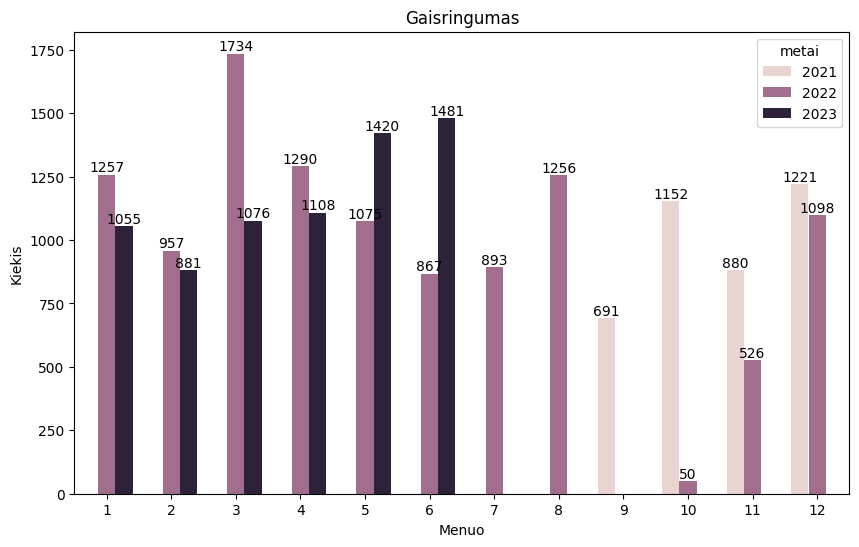

In [60]:
fig, axes = plt.subplots(figsize=(10,6))
gaisrai = gaisringumas.groupby(['metai','menuo'])['ivykio_id'].count().reset_index()
axes.set_title('Gaisringumas')
ax = sns.barplot(data=gaisrai,x = 'menuo', y='ivykio_id', ax=axes, hue = 'metai')
axes.set(xlabel='Menuo',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

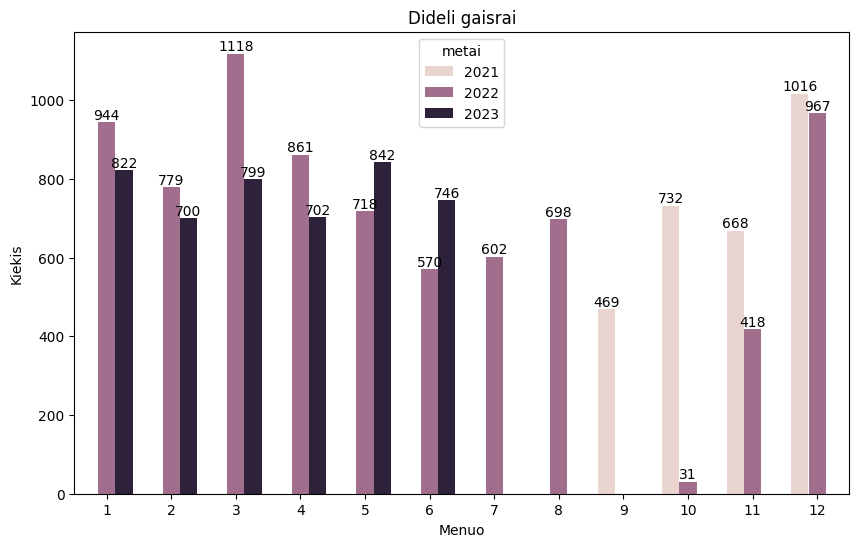

In [61]:
fig, axes = plt.subplots(figsize=(10,6))
gaisrai = did_gaisrai.groupby(['metai','menuo'])['ivykio_id'].count().reset_index()
axes.set_title('Dideli gaisrai')
ax = sns.barplot(data=gaisrai,x = 'menuo', y='ivykio_id', ax=axes, hue = 'metai')
axes.set(xlabel='Menuo',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

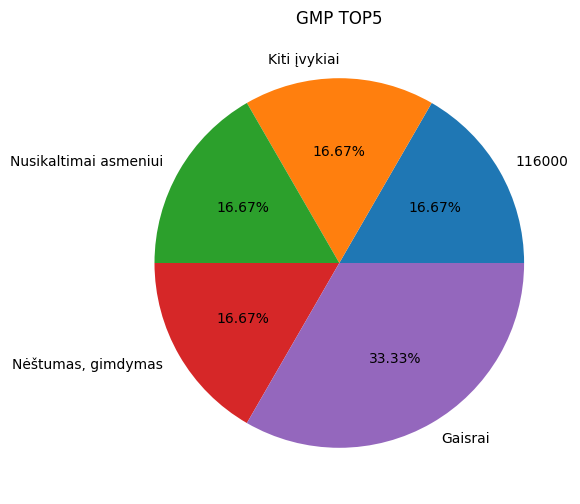

In [77]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_title('GMP TOP5')
gmp_priez = gmp[['zemesnis_ivykio_tipas', 'ivykio_id']].groupby('zemesnis_ivykio_tipas').count().reset_index().sort_values(by= 'ivykio_id',ascending=True)[:5]
plt.pie(x=gmp_priez['ivykio_id'], labels=gmp_priez['zemesnis_ivykio_tipas'], autopct='%.2f%%')
plt.show()

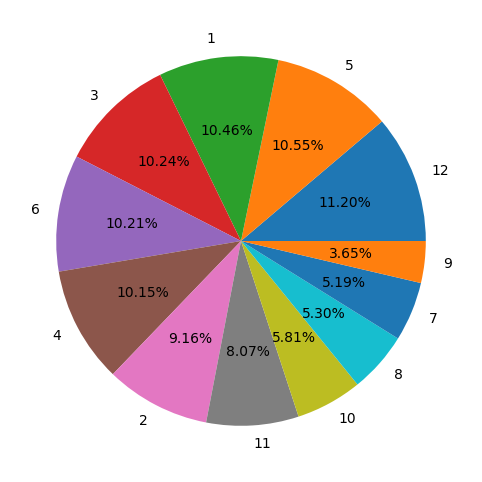

In [79]:
fig, axes = plt.subplots(figsize=(10,6))
gmp_priez = gmp[['menuo', 'ivykio_id']].groupby('menuo').count().reset_index().sort_values(by= 'ivykio_id',ascending=False)
plt.pie(x=gmp_priez['ivykio_id'], labels=gmp_priez['menuo'], autopct='%.2f%%')
plt.show()

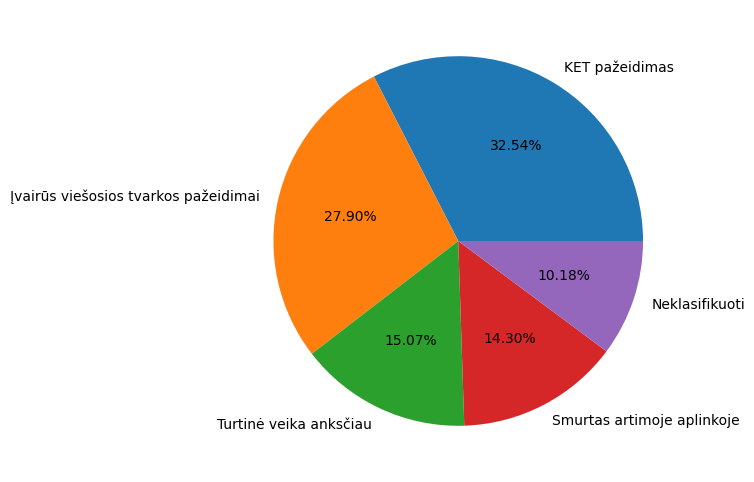

In [103]:
fig, axes = plt.subplots(figsize=(10,6))
gmp_polic = gmp[gmp['Policija'] == True][['zemesnis_ivykio_tipas', 'ivykio_id', 'metai']].groupby('zemesnis_ivykio_tipas').count().reset_index().sort_values(by= 'ivykio_id',ascending=False)[:5]
plt.pie(x=gmp_polic['ivykio_id'], labels=gmp_polic['zemesnis_ivykio_tipas'], autopct='%.2f%%')
plt.show()

In [110]:
gmp_policija = gmp[gmp['Policija'] == True]
gmp_palyg0 = gmp_policija[gmp_policija['zemesnis_ivykio_tipas'] == 'KET pažeidimas']
gmp_palyg1 = gmp_policija[gmp_policija['zemesnis_ivykio_tipas'] == 'Smurtas artimoje aplinkoje']
gmp_palyg = pd.concat([gmp_palyg0,gmp_palyg1])

In [111]:
gmp_palyg.head()

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id,Did_gaisras,Gaisras,Policija
4,323452,6174157,6.1.2,a15a6960d21f,2022,3,Policijos įvykiai,KET pažeidimas,5,None,None,True
7,319882,6181868,6.1.2,ca3198b05c6e,2022,3,Policijos įvykiai,KET pažeidimas,8,None,None,True
21,517539,6105119,6.1.2,d455e7e17d52,2022,3,Policijos įvykiai,KET pažeidimas,22,None,None,True
23,457182,6199776,6.1.2,38a0a9a49b0d,2022,3,Policijos įvykiai,KET pažeidimas,24,None,None,True
26,454434,6196893,6.1.2,eebf83b8715a,2022,3,Policijos įvykiai,KET pažeidimas,27,None,None,True


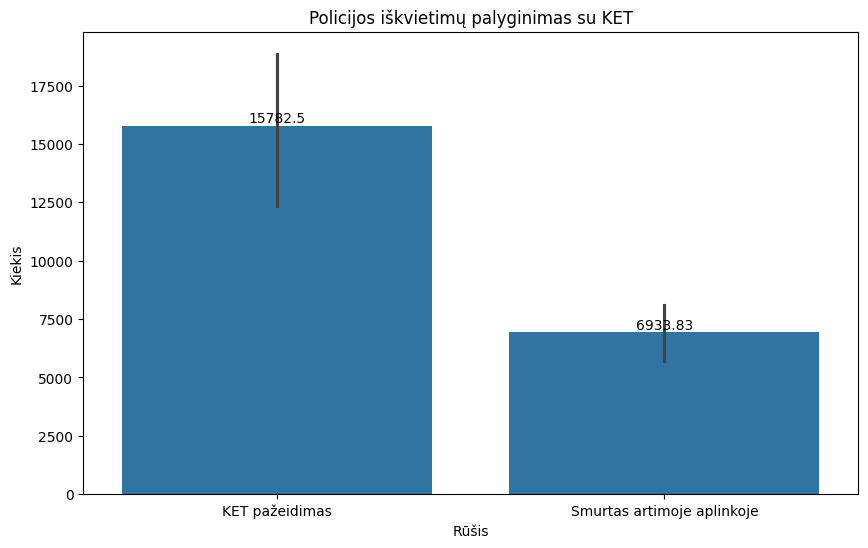

In [117]:
fig, axes = plt.subplots(figsize=(10,6))
polic = gmp_palyg.groupby(['zemesnis_ivykio_tipas','menuo'])['ivykio_id'].count().reset_index()
axes.set_title('Policijos iškvietimų palyginimas su KET')
ax = sns.barplot(data=polic, x = 'zemesnis_ivykio_tipas', y='ivykio_id', ax=axes)
axes.set(xlabel='Rūšis',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

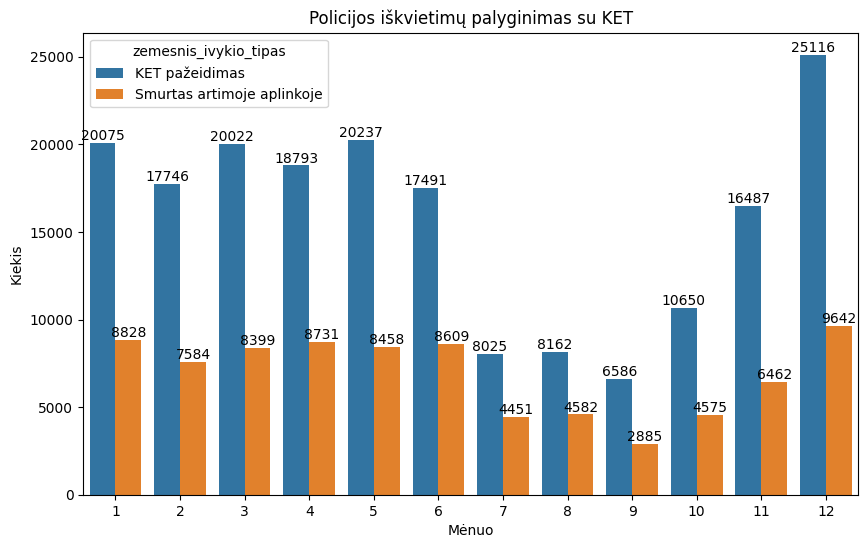

In [114]:
fig, axes = plt.subplots(figsize=(10,6))
polic = gmp_palyg.groupby(['zemesnis_ivykio_tipas','menuo'])['ivykio_id'].count().reset_index()
axes.set_title('Policijos iškvietimų palyginimas su KET')
ax = sns.barplot(data=polic, x = 'menuo', y='ivykio_id', ax=axes, hue='zemesnis_ivykio_tipas')
axes.set(xlabel='Mėnuo',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [ ]:
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/27c22303570541fd9dae7299be45d601_0/about
# Ar yra skirtumas tarp to, kas administruoja
# pastatą, ir noro renovuotis? (Suraskite, kiek procentų yra renovavęsi
# pagal administravimo pobūdį)
# Ar galima teigti, kad kuo senesnis pastatas, tuo gyventojai
# nori labiau renovacijos? 
# (pastatų amžius vs renovuotų tokio amžiaus pastatų kiekis)
# kurioje seniūnijoje daugiausiasi renovuotų pastatų?
# kokios trys seniūnijos yra renovacijos priekyje?

In [118]:
renovacijos = pd.read_csv('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Renovacijos.csv')

In [156]:
renovacijos.head()

,X,Y,vda_id,seniunija,gatve,namo_nr,butu_sk,negyvenamu_sk,aukstu_sk,namo_plotas,...,valdymo_forma,valdytojas,admin_pabaiga,ar_perduotas,bukle,atlikti_darbai,object_id,geom,Metai,Renovuotas
0,NaN,NaN,4fc5a7d3836798b,NaN,Vilniaus g.,24A,NaN,0,NaN,0.00,...,Bendrija,NaN,NaN,1,NaN,NaN,1,NaN,NaN,Ne
1,496691.0,6081114.0,0890dd305e40157,Šančių,A. Juozapavičiaus pr.,20,22.0,0,4.0,1323.68,...,Jungtinės veiklos sutartis,JVS A. Juozapavičiaus 20,2015/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, tinkuojamas fasadas,...",2,NaN,60.0,Taip
2,496194.0,6081568.0,98974b9870e990b,Šančių,A. Juozapavičiaus pr.,46,23.0,1,3.0,869.67,...,Administratorius,"Civinity namai Kaunas, UAB",2016/01/01 00:00:00+00,1,Renovuotas,"Fasado sienų šiltinimas, ventiliuojamas fasada...",3,NaN,70.0,Taip
3,492920.0,6085540.0,80cb2d1f7a6c1fa,Vilijampolės,A. Kriščiukaičio g.,6,48.0,0,12.0,3422.00,...,Bendrija,"DNSB ""K6""",2017/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",4,NaN,60.0,Taip
4,497636.0,6081522.0,f92748df3ba9189,Panemunės,A. Smetonos al.,43,9.0,0,3.0,462.99,...,Bendrija,"DNSB ""Bičiulių alėja""",2015/01/01 00:00:00+00,1,Renovuotas,"Cokolis šiltinamas, Fasadas šiltinamas, Stogo ...",5,NaN,60.0,Taip


In [138]:
renovacijos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   X               4103 non-null   float64            
 1   Y               4103 non-null   float64            
 2   vda_id          4109 non-null   object             
 3   seniunija       4104 non-null   object             
 4   gatve           4109 non-null   object             
 5   namo_nr         4109 non-null   object             
 6   butu_sk         4066 non-null   float64            
 7   negyvenamu_sk   4109 non-null   int64              
 8   aukstu_sk       4024 non-null   float64            
 9   namo_plotas     4109 non-null   float64            
 10  zemes_plotas    4109 non-null   float64            
 11  statybos_metai  2954 non-null   datetime64[ns, UTC]
 12  valdymo_forma   4109 non-null   object             
 13  valdytojas      4106 non-null   o

In [147]:
renovacijos['statybos_metai'] = pd.to_datetime(renovacijos['statybos_metai'])

In [149]:
renovacijos['Metai'] = np.floor((2024-pd.DatetimeIndex(renovacijos['statybos_metai']).year)/10)*10

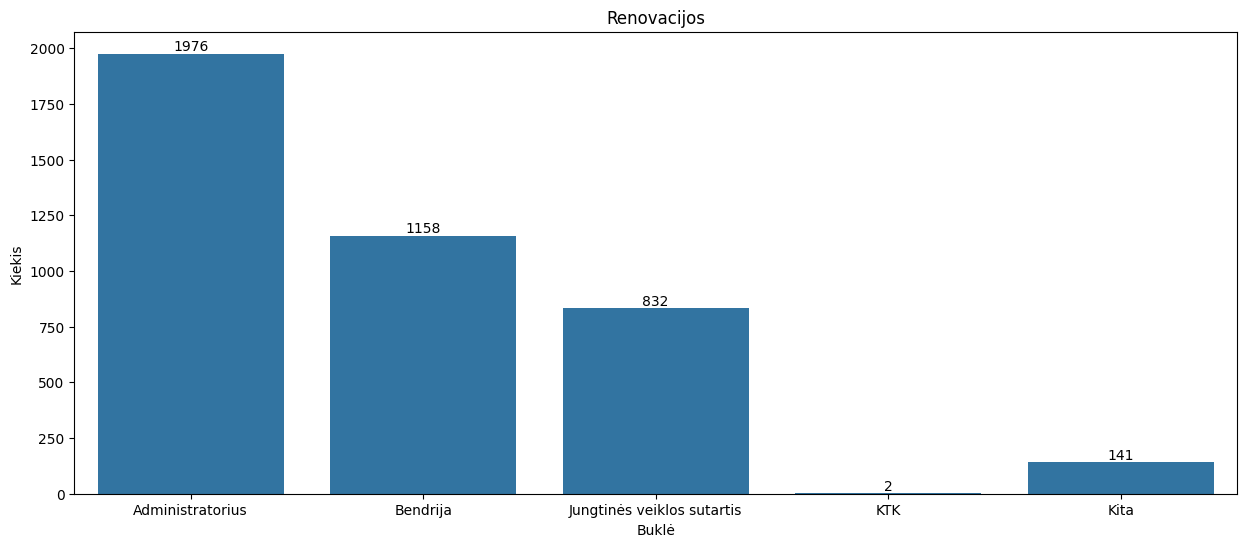

In [132]:
fig, axes = plt.subplots(figsize=(15,6))
ren = renovacijos.groupby(['valdymo_forma'])['vda_id'].count().reset_index()
axes.set_title('Renovacijos')
ax = sns.barplot(data=ren, x = 'valdymo_forma', y='vda_id', ax=axes)
axes.set(xlabel='Buklė',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

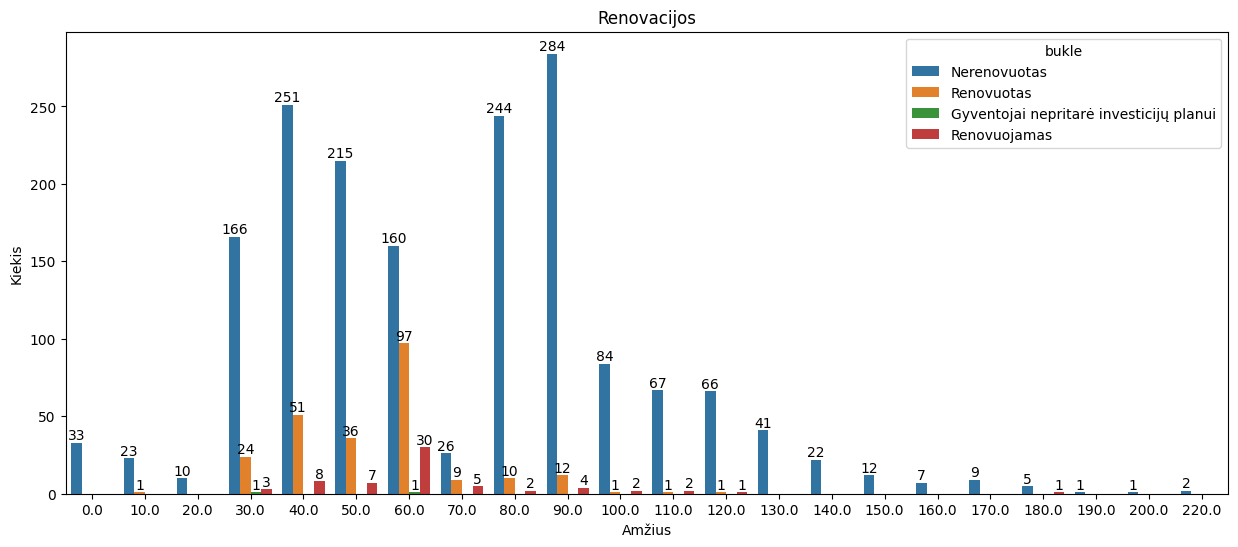

In [151]:
fig, axes = plt.subplots(figsize=(15,6))
ren = renovacijos.groupby(['bukle', 'Metai'])['vda_id'].count().reset_index()
axes.set_title('Renovacijos')
ax = sns.barplot(data=ren, x = 'Metai', y='vda_id', ax=axes, hue='bukle')
axes.set(xlabel='Amžius',ylabel='Kiekis')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [153]:
def ren(i):
    if 'Renovuotas' in str(i):
        return 'Taip'
    else:
        return 'Ne'

In [154]:
renovacijos['Renovuotas'] = renovacijos['bukle'].apply(ren)

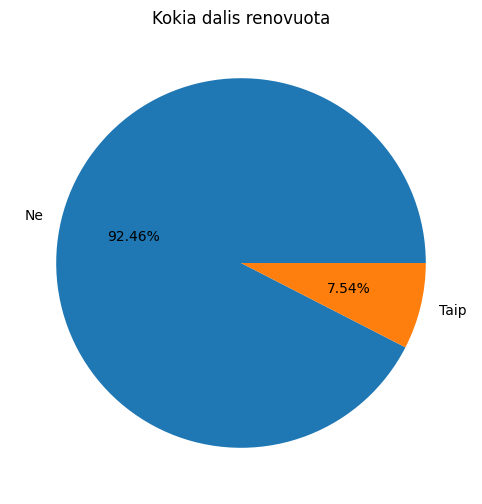

In [159]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_title('Kokia dalis renovuota')
renov = renovacijos.groupby(['Renovuotas'])['vda_id'].count().reset_index()
plt.pie(x=renov['vda_id'], labels=renov['Renovuotas'], autopct='%.2f%%')
plt.show()

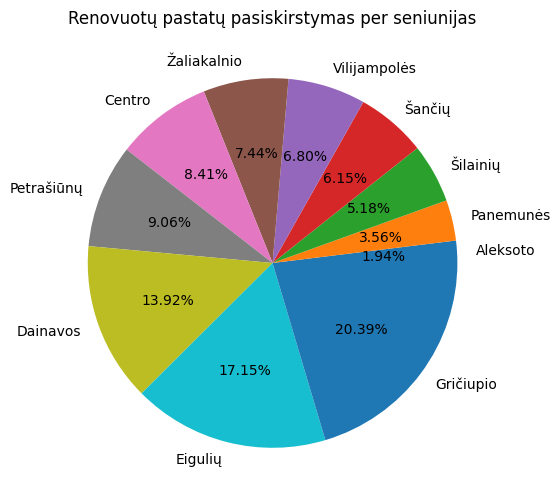

In [165]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_title('Renovuotų pastatų pasiskirstymas per seniunijas')
ren_sen = renovacijos[renovacijos['Renovuotas'] == 'Taip'].groupby(['seniunija'])['vda_id'].count().reset_index().sort_values(by= 'vda_id',ascending=True)
plt.pie(x=ren_sen['vda_id'], labels=ren_sen['seniunija'], autopct='%.2f%%')
plt.show()

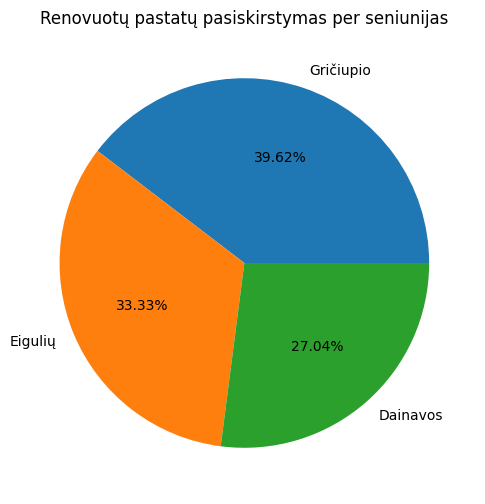

In [167]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_title('Renovuotų pastatų pasiskirstymas per seniunijas')
ren_sen = renovacijos[renovacijos['Renovuotas'] == 'Taip'].groupby(['seniunija'])['vda_id'].count().reset_index().sort_values(by= 'vda_id',ascending=False)[:3]
plt.pie(x=ren_sen['vda_id'], labels=ren_sen['seniunija'], autopct='%.2f%%')
plt.show()

In [168]:
#Suraskite 2013-2023 metų eismo įvykuose daugiausiai
# kartų užfiksuotą automobilių a) gamintoją b) modelį.
# Kiekvienais metais tas gamintojas/modelis gali būti skirtingas - pateikite bar/barh grafikus.
# Kiek iš užfiksuotų automobilių turėjo Kasko draudimą?

In [171]:
iv2013 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2013_12_31.json')

In [172]:
iv2013 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2013_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2014 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2014_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2015 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2015_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2016 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2016_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2017 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2017_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2018 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2018_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2019 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2019_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2020 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2020_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2021 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2021_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2022 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2022_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
iv2023 = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2023_12_31.json')[['registravimoData','dalyviuSkaicius','apgadintuTpSkaicius','zuvusiuSkaicius','suzeistuSkaicius','neblaivusKaltininkai','apsvaigeKaltininkai','schema2','eismoDalyviai','eismoTranspPreimone']]
s_of_dfs = [iv2013,iv2014,iv2015,iv2016,iv2017,iv2018,iv2019,iv2020,iv2021,iv2022,iv2023]
ivykiai = pd.concat(s_of_dfs)

In [194]:
ivykiai['dataLaikas'] = pd.to_datetime(ivykiai['registravimoData'])
ivykiai['Metai'] = ivykiai['dataLaikas'].dt.year
def tpgam(x):
    s = []
    for i in x:
        s.append(i['marke'])
    return s
def tpmod(x):
    s = []
    for i in x:
        s.append(i['modelis'])
    return s
ivykiai['Gamintojas'] = ivykiai['eismoTranspPreimone'].apply(tpgam)
ivykiai['Modelis'] = ivykiai['eismoTranspPreimone'].apply(tpmod)



In [195]:
ivykiai.head()

,registravimoData,dalyviuSkaicius,apgadintuTpSkaicius,zuvusiuSkaicius,suzeistuSkaicius,neblaivusKaltininkai,apsvaigeKaltininkai,schema2,eismoDalyviai,eismoTranspPreimone,dataLaikas,Metai,tpId,Gamintojas,Modelis
0,2013-01-01 00:02,2.0,1.0,0,0,None,None,Susidūrimas su stovinčia TP,"[{'dalyvisId': 22897970, 'kategorija': 'Automo...","[{'tpId': 19801434, 'regValstybe': 'Lietuva', ...",2013-01-01 00:02:00,2013,19801433,"[AUDI, None]","[100, None]"
1,2013-01-01 01:26,2.0,1.0,0,0,None,None,Kiti susidūrimai,"[{'dalyvisId': 22897891, 'kategorija': 'Automo...","[{'tpId': 19801407, 'regValstybe': None, 'kate...",2013-01-01 01:26:00,2013,19801407,"[None, PORSCHE]","[None, CAYENNE S]"
2,2013-01-01 02:26,1.0,1.0,0,0,None,None,Kiti susidūrimai,"[{'dalyvisId': 21794565, 'kategorija': 'Automo...","[{'tpId': 19226309, 'regValstybe': 'Lietuva', ...",2013-01-01 02:26:00,2013,None,[SUBARU],[FORESTER]
3,2013-01-01 03:27,2.0,1.0,0,0,None,None,Kiti susidūrimai,"[{'dalyvisId': 22897876, 'kategorija': 'Automo...","[{'tpId': 19801349, 'regValstybe': 'Lietuva', ...",2013-01-01 03:27:00,2013,None,[VOLKSWAGEN],[PASSAT]
4,2013-01-01 03:49,2.0,2.0,0,0,None,None,Kiti eismo įvykiai,"[{'dalyvisId': 24796989, 'kategorija': 'Automo...","[{'tpId': 21000436, 'regValstybe': 'Lietuva', ...",2013-01-01 03:49:00,2013,21000435,"[LANCIA, AUDI]","[LYBRA, A4]"


In [197]:
iv = ivykiai[:10]

In [207]:
gamintojai = []
metai =[]
for gam, met in zip(ivykiai['Gamintojas'],ivykiai['Metai']):
    for g in gam:
        if g is not None:
            gamintojai.append(g)
            metai.append(met)

In [215]:
gam = set(gamintojai)
print(gam)

{'SKODA', 'RIEJU', 'MOSKVICH', 'GROENEWEGEN', 'MTZ', 'Demag', 'HORZ', 'CHT', 'REMORK', 'BEYERLAND', 'JONG-MUNST', 'NSU', 'N', 'SAAB', 'MOL', 'PRESTEL', 'ECOVRAC', 'FRUEHAUF', 'HOBBY', 'CMT', 'WEBER', 'Lidagropromash', 'UNITED TRAILERS', 'BTG', 'Mutti Amos', 'SMART', 'ARCTIC CAT', 'Rostselmash', 'UNSINN', 'STEMA', 'SCHMITZ', 'DAELIM', 'HOFMANN', 'PARATOR', 'STOPEXIM', 'SIMPA', 'VAK', 'APRILIA', 'KUMLIN', 'CAN-AM', 'LADA', 'T-25', 'FLIEGL', 'EURA MOBIL', 'KLEINE', 'HAPERT', 'ZASLAW', 'DELTA', 'BAZALTAS', 'ZUK', 'M', 'DAPA', 'FSN', 'SCHARFEN', 'LIGIER', '2PTS-4', '2-PR-15', 'MELTON', 'SCHWARZMUELLER', 'Faresin', 'BOMBARDIER', 'BIANCHI', '2PTS-6', 'International (IHC)', 'Lipecko TG (LTZ)', 'JINCHENG', 'CAMRO', 'TORO', 'PP', 'KOENIG', 'Borum', 'VICTORY', 'MKV', 'CF', 'OMEGA', 'FAHRZ-BAU', 'BETA', 'ROTTGER', 'BA', 'POLAR', 'CARSTABO', 'SUBARU', 'KK', 'TD', 'PAAS', 'TRIUMPH', 'TOYO KOGYO', 'HARRYDA', 'KARFA', 'PIAGGIO', 'WARNCKE', 'JIANSHE', 'FOBO', 'MOTOGINO', 'HUMMER', 'GINAF', 'Fermec', 'W